## Task 1: Thu thập dữ liệu (Data Collection)

### Task 1.1: Cấu hình

In [31]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Task 1.2: ghép data 12 file của 12 tháng vào 1 file

In [32]:
path = 'D:/Project_Data_Analyst/Project Sales 12 Months Analysis/Data Gốc/'
frames = []
for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath = path + file
        df = pd.read_csv(filepath)
        frames.append(df)
        result = pd.concat(frames)
result
result.to_csv('annualSales12months.csv', index=False)

In [33]:
print(result.head())

  Order ID                   Product Quantity Ordered Price Each  \
0   141234                    iPhone                1        700   
1   141235  Lightning Charging Cable                1      14.95   
2   141236          Wired Headphones                2      11.99   
3   141237          27in FHD Monitor                1     149.99   
4   141238          Wired Headphones                1      11.99   

       Order Date                       Purchase Address  
0  01/22/19 21:25        944 Walnut St, Boston, MA 02215  
1  01/28/19 14:15       185 Maple St, Portland, OR 97035  
2  01/17/19 13:33  538 Adams St, San Francisco, CA 94016  
3  01/05/19 20:33     738 10th St, Los Angeles, CA 90001  
4  01/25/19 11:59          387 10th St, Austin, TX 73301  


In [34]:
print(result.info())

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB
None


In [35]:
print(result.describe())

        Order ID               Product Quantity Ordered Price Each  \
count     186305                186305           186305     186305   
unique    178438                    20               10         24   
top     Order ID  USB-C Charging Cable                1      11.95   
freq         355                 21903           168552      21903   

        Order Date  Purchase Address  
count       186305            186305  
unique      142396            140788  
top     Order Date  Purchase Address  
freq           355               355  


In [36]:
print(result.nunique())

Order ID            178438
Product                 20
Quantity Ordered        10
Price Each              24
Order Date          142396
Purchase Address    140788
dtype: int64


## Task 2: Tiền xử lý dữ liệu (Data Preprocessing)

### Task 2.1: Xóa các hàng trống thừa 

In [37]:
result = result.dropna(how='all')

### Task 2.2: Kiểm tra hàng trùng lặp 

In [38]:
print(result.duplicated().sum())


618


### Task 2.3: Xóa hàng trùng lặp

In [39]:
result = result.drop_duplicates()


### Task 2.4: Kiểm tra null

In [40]:
print(result.isnull().sum())

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


In [41]:
result.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


### Task 2.5: Đưa về đúng định dạng

In [42]:
# Chuyển đổi cột 'Quantity Ordered' sang kiểu số, các giá trị không hợp lệ sẽ thành NaN
result['Quantity Ordered'] = pd.to_numeric(result['Quantity Ordered'], errors='coerce').astype('Int64')

# Chuyển đổi cột 'Price Each' sang kiểu số, các giá trị không hợp lệ sẽ thành NaN
result['Price Each'] = pd.to_numeric(result['Price Each'], errors='coerce').astype('float64')

# Chuyển đổi cột 'Order Date' sang kiểu datetime, các giá trị không hợp lệ sẽ thành NaN
result['Order Date'] = pd.to_datetime(result['Order Date'], format='%m/%d/%y %H:%M', errors='coerce')

# Lọc các bản ghi có giá trị không hợp lệ trong từng cột
invalid_quantity = result[result['Quantity Ordered'].isna()]
invalid_price = result[result['Price Each'].isna()]
invalid_date = result[result['Order Date'].isna()]

# In ra các bản ghi không hợp lệ
print("Invalid Quantity Ordered:")
print(invalid_quantity)

print("Invalid Price Each:")
print(invalid_price)

print("Invalid Order Date:")
print(invalid_date)


Invalid Quantity Ordered:
      Order ID  Product  Quantity Ordered  Price Each Order Date  \
1073  Order ID  Product              <NA>         NaN        NaT   

      Purchase Address  
1073  Purchase Address  
Invalid Price Each:
      Order ID  Product  Quantity Ordered  Price Each Order Date  \
1073  Order ID  Product              <NA>         NaN        NaT   

      Purchase Address  
1073  Purchase Address  
Invalid Order Date:
      Order ID  Product  Quantity Ordered  Price Each Order Date  \
1073  Order ID  Product              <NA>         NaN        NaT   

      Purchase Address  
1073  Purchase Address  


In [43]:
# Xóa các bản ghi chứa giá trị NaN
result.dropna(subset=['Quantity Ordered', 'Price Each', 'Order Date'], inplace=True)

In [44]:
# kiểm tra lại xem còn giá trị không hợp lệ không và kiểm tra lại kiểu dữ liệu
print(result.isna().sum())
print(result.dtypes)

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64
Order ID                    object
Product                     object
Quantity Ordered             Int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object


In [45]:
result.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


## Task 3: Khám phá dữ liệu (Exploratory Data Analysis - EDA)

### Task 3.1: Tạo thêm các trường cần thiết

In [46]:
result['Payments'] = result['Quantity Ordered'] * result['Price Each']
moving_column = result.pop('Payments')
result.insert(4, 'Payments', moving_column)
result.head()

,Order ID,Product,Quantity Ordered,Price Each,Payments,Order Date,Purchase Address
0,141234,iPhone,1,700.00,700.0,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


### Task 3.2: Phân tích thống kê và phân phối dữ liệu

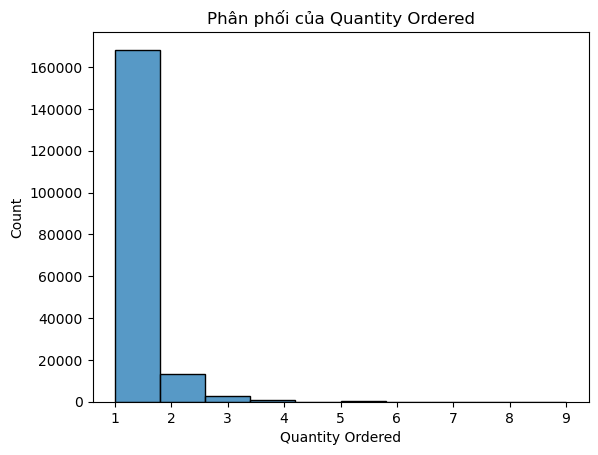

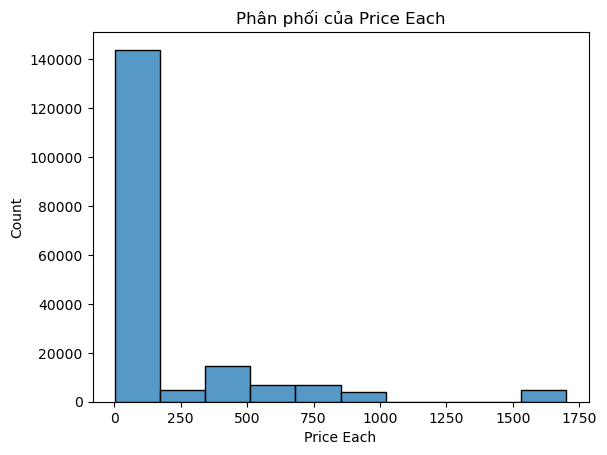

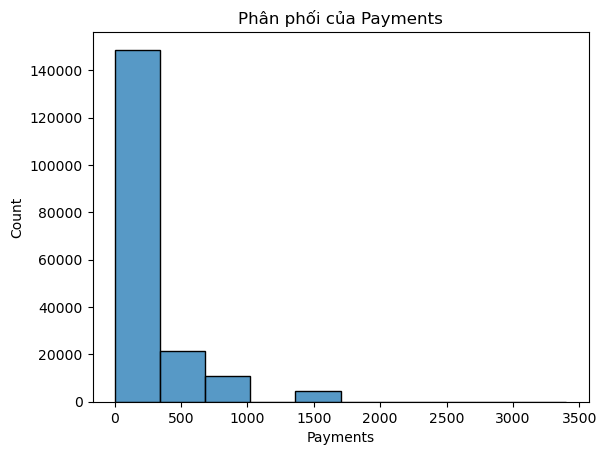

In [47]:
# Phân phối của Quantity Ordered
sns.histplot(result['Quantity Ordered'], kde=False, bins=10)
plt.title('Phân phối của Quantity Ordered')
plt.show()

# Phân phối của Price Each
sns.histplot(result['Price Each'], kde=False, bins=10)
plt.title('Phân phối của Price Each')
plt.show()

# Phân phối của Payments
sns.histplot(result['Payments'], kde=False, bins=10)
plt.title('Phân phối của Payments')
plt.show()


### Task 3.3: Tìm hiểu mối quan hệ giữa các biến

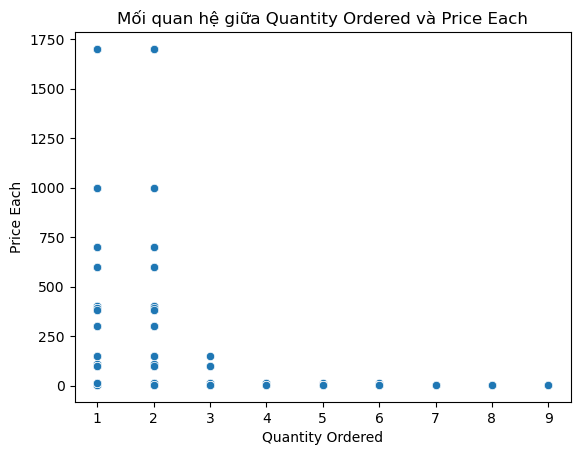

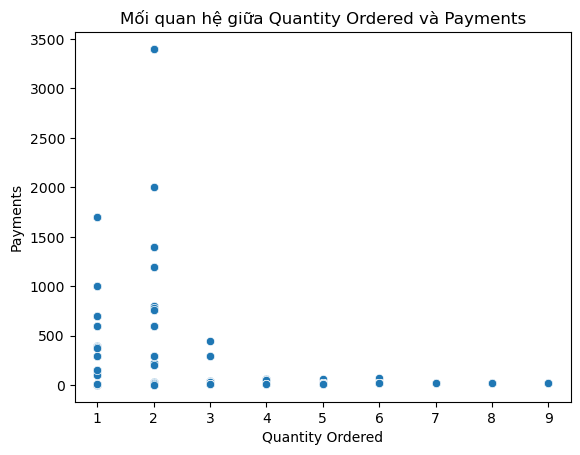

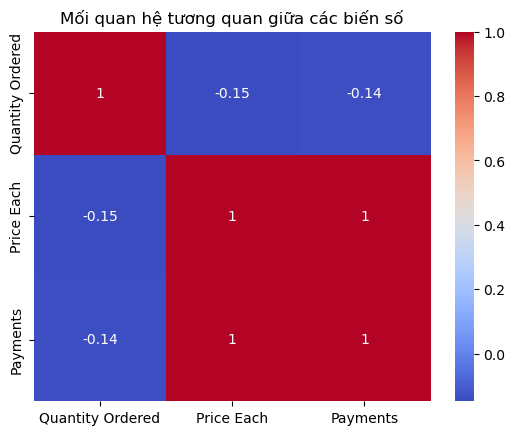

In [48]:
# Mối quan hệ giữa Quantity Ordered và Price Each
sns.scatterplot(x='Quantity Ordered', y='Price Each', data=result)
plt.title('Mối quan hệ giữa Quantity Ordered và Price Each')
plt.show()

# Mối quan hệ giữa Payments và Quantity Ordered:
sns.scatterplot(x='Quantity Ordered', y='Payments', data=result)
plt.title('Mối quan hệ giữa Quantity Ordered và Payments')
plt.show()

# Heatmap để tìm hiểu mối tương quan giữa các biến số:
corr = result[['Quantity Ordered', 'Price Each', 'Payments']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mối quan hệ tương quan giữa các biến số')
plt.show()


### Task 3.4: Tìm kiếm và phân tích outliers (ngoại lệ)

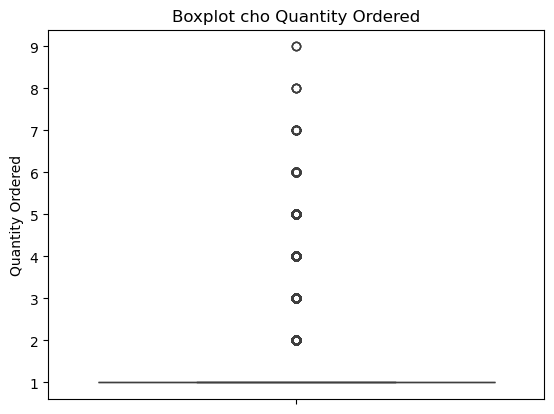

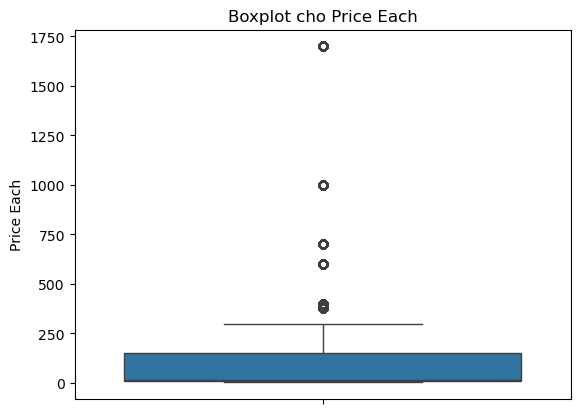

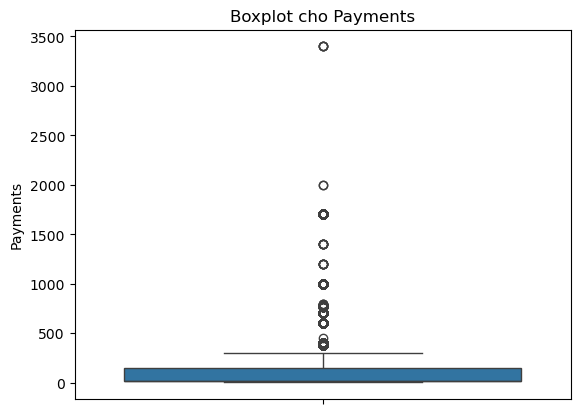

In [49]:
# Tìm outliers trong Quantity Ordered và Price Each bằng boxplot:
sns.boxplot(result['Quantity Ordered'])
plt.title('Boxplot cho Quantity Ordered')
plt.show()

sns.boxplot(result['Price Each'])
plt.title('Boxplot cho Price Each')
plt.show()

# Xác định các giá trị bất thường trong Payments:
sns.boxplot(result['Payments'])
plt.title('Boxplot cho Payments')
plt.show()


## Task 4: Báo cáo trực quan hóa

### Task 4.1: Doanh số tháng nào cao nhất và tháng đó doanh số là bao nhiêu

In [50]:
result['Month'] = result['Order Date'].dt.month
payment_by_month = result.groupby('Month')['Payments'].sum().sort_values(ascending=False)
print(payment_by_month)

Month
12     4608295.7
10    3734777.86
4     3389217.98
11    3197875.05
5     3150616.23
3     2804973.35
7     2646461.32
6     2576280.15
8     2241083.37
2     2200078.08
9     2094465.69
1     1821413.16
Name: Payments, dtype: Float64


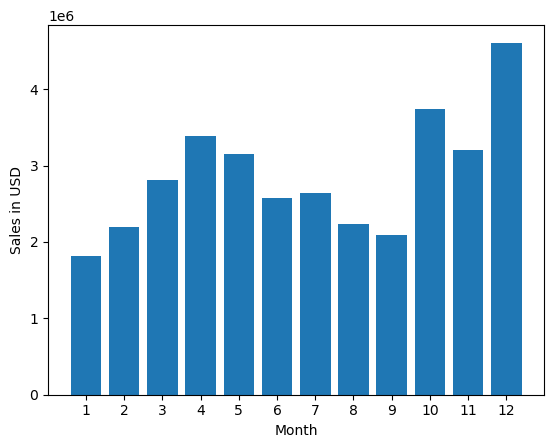

In [51]:
months = [months for months, payment in payment_by_month.items()]
plt.bar(x=months, height=payment_by_month)
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.show()

### Task 4.2: Khu vực nào bán chạy nhất và doanh số khu vực đó là bao nhiêu

In [52]:
address_to_city = lambda address:address.split(',')[1]
result['City'] = result['Purchase Address'].apply(address_to_city)
payment_by_city = result.groupby('City')['Payments'].sum().sort_values(ascending=False)
print(payment_by_city)

City
San Francisco    8254743.55
Los Angeles      5448304.28
New York City    4661867.14
Boston           3658627.65
Atlanta          2794199.07
Dallas           2765373.96
Seattle          2745046.02
Portland         2319331.94
Austin           1818044.33
Name: Payments, dtype: Float64


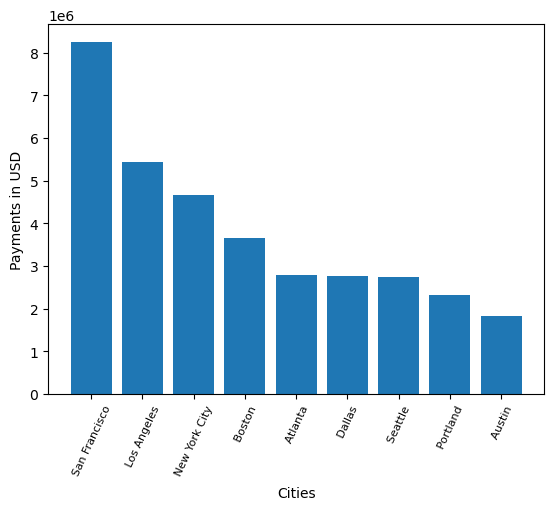

In [53]:
cities = [city for city, payment in payment_by_city.items()]
plt.bar(x=cities, height=payment_by_city)
plt.xticks(cities, rotation = 65, size = 8)
plt.xlabel('Cities')
plt.ylabel('Payments in USD')
plt.show()

### Task 4.3: Những sản phẩm nào thường được bán cùng nhau

In [54]:
result_dup = result[result['Order ID'].duplicated(keep=False)]
groupProduct = lambda product: ', '.join(product)
result_dup['All Products'] = result_dup.groupby('Order ID')['Product'].transform(groupProduct)
result_dup = result_dup[['Order ID', 'All Products']].drop_duplicates()
result_dup['All Products'].value_counts().head()

C:\Users\admin\AppData\Local\Temp\ipykernel_8348\2972805990.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_dup['All Products'] = result_dup.groupby('Order ID')['Product'].transform(groupProduct)


All Products
iPhone, Lightning Charging Cable         886
Google Phone, USB-C Charging Cable       857
iPhone, Wired Headphones                 361
Vareebadd Phone, USB-C Charging Cable    312
Google Phone, Wired Headphones           303
Name: count, dtype: int64

### Task 4.4: Sản phẩm nào bán được nhiều nhất? Dự đoán lý do vì sao nó được bán nhiều nhất?

In [55]:
payments_by_product = result.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)
print(payments_by_product)

Product
AAA Batteries (4-pack)        30986
AA Batteries (4-pack)         27615
USB-C Charging Cable          23931
Lightning Charging Cable      23169
Wired Headphones              20524
Apple Airpods Headphones      15637
Bose SoundSport Headphones    13430
27in FHD Monitor               7541
iPhone                         6847
27in 4K Gaming Monitor         6239
34in Ultrawide Monitor         6192
Google Phone                   5529
Flatscreen TV                  4813
Macbook Pro Laptop             4725
ThinkPad Laptop                4128
20in Monitor                   4126
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: Int64


C:\Users\admin\AppData\Local\Temp\ipykernel_8348\1268510428.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products_ls, rotation=85, size=8)


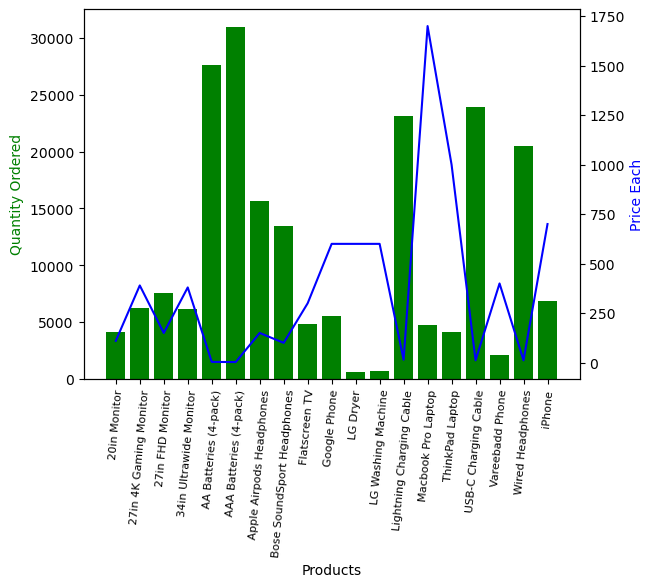

In [56]:
all_products = result.groupby('Product').sum(numeric_only=True)['Quantity Ordered']
prices = result.groupby('Product').mean(numeric_only=True)['Price Each']
products_ls = [product for product, quant in all_products.items()]
x = products_ls
y1 = all_products
y2 = prices
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(x, y1, color='g')
ax2.plot(x, y2, 'b-')
ax1.set_xticklabels(products_ls, rotation=85, size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each', color='b')
plt.show()

### Task 4.5: Mối quan hệ giữa số lượng mua và doanh thu

C:\Users\admin\AppData\Local\Temp\ipykernel_8348\2795569743.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products_ls, rotation=85, size=8)


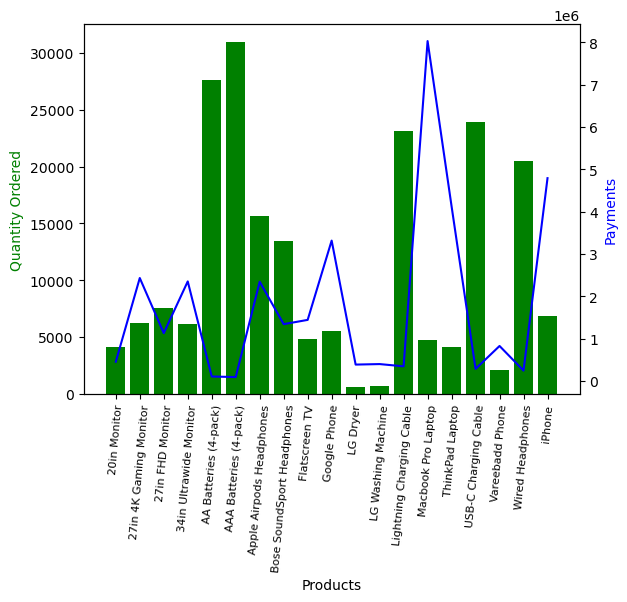

In [57]:
all_products = result.groupby('Product').sum(numeric_only=True)['Quantity Ordered']
sales = result.groupby('Product').sum(numeric_only=True)['Payments']
products_ls = [product for product, quant in all_products.items()]
x = products_ls
y1 = all_products
y2 = sales
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(x, y1, color='g')
ax2.plot(x, y2, 'b-')
ax1.set_xticklabels(products_ls, rotation=85, size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Payments', color='b')
plt.show()

### Task 4.6: Nên hiển thị quảng cáo vào thời điểm nào để tối đa hóa khả năng khách hàng mua sản phẩm?

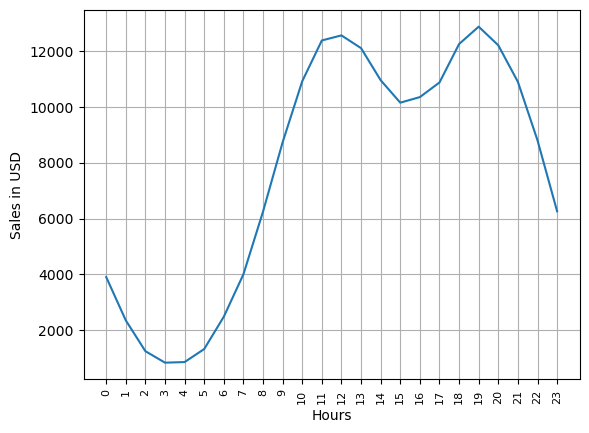

In [58]:
result['Hours'] = result['Order Date'].dt.hour
payment_by_hours = result.groupby('Hours').count()['Payments']

hours = [hour for hour, payment in payment_by_hours.items()]
plt.plot(hours, payment_by_hours)
plt.grid()
plt.xticks(hours, rotation = 90, size = 8)
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.show()